In [5]:
import openai
import json
import os
import base64
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
text = open('phrases.txt', 'r').read().split('\n')

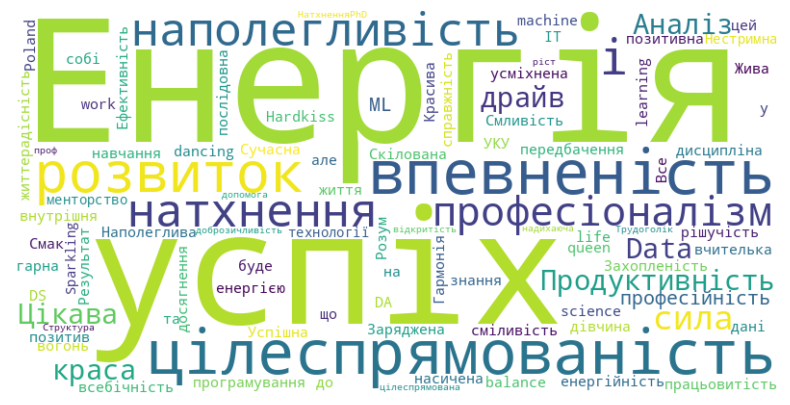

In [7]:
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white"
).generate(' '.join(text))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('image.png')

In [14]:
from collections import Counter
import re

In [17]:
# Function to clean and extract words
def clean_and_extract_words(phrases):
    words = []
    for phrase in phrases:
        # Remove punctuation and special symbols
        clean_phrase = re.sub(r'[^\w\s]', '', phrase.lower())
        # Split into words
        words.extend(clean_phrase.split())
    return words

# Extracted words
extracted_words = clean_and_extract_words(text)
print(extracted_words)

['результат', 'і', 'рішучість', 'енергія', 'наполегливість', 'натхнення', 'цілеспрямованість', 'дисципліна', 'розвиток', 'жива', 'насичена', 'усміхнена', 'сила', 'навчання', 'продуктивність', 'знання', 'енергійність', 'уку', 'впевненість', 'у', 'собі', 'успіх', 'заряджена', 'енергією', 'на', 'позитив', 'аналіз', 'але', 'цей', 'що', 'data', 'аналіз', 'успіх', 'сучасна', 'програмування', 'передбачення', 'драйв', 'poland', 'працьовитість', 'захопленість', 'смливість', 'і', 'успіх', 'смак', 'до', 'життя', 'красива', 'цілеспрямованість', 'наполегливість', 'розвиток', 'внутрішня', 'сила', 'та', 'краса', 'цікава', 'дівчина', 'все', 'буде', 'hardkiss', 'енергія', 'сміливість', 'цілеспрямованість', 'життерадісність', 'енергія', 'розвиток', 'і', 'професійність', 'іт', 'вчителька', 'вогонь', 'ефективність', 'впевненість', 'професіоналізм', 'впевненість', 'професіоналізм', 'успішна', 'цікава', 'гарна', 'продуктивність', 'скілована', 'послідовна', 'позитивна', 'розум', 'успіх', 'енергія', 'наполегл

In [18]:
Counter(extracted_words)

Counter({'енергія': 7,
         'успіх': 6,
         'цілеспрямованість': 5,
         'впевненість': 5,
         'розвиток': 4,
         'і': 3,
         'наполегливість': 3,
         'натхнення': 3,
         'професіоналізм': 3,
         'сила': 2,
         'продуктивність': 2,
         'аналіз': 2,
         'data': 2,
         'драйв': 2,
         'краса': 2,
         'цікава': 2,
         'професійність': 2,
         'ml': 2,
         'результат': 1,
         'рішучість': 1,
         'дисципліна': 1,
         'жива': 1,
         'насичена': 1,
         'усміхнена': 1,
         'навчання': 1,
         'знання': 1,
         'енергійність': 1,
         'уку': 1,
         'у': 1,
         'собі': 1,
         'заряджена': 1,
         'енергією': 1,
         'на': 1,
         'позитив': 1,
         'але': 1,
         'цей': 1,
         'що': 1,
         'сучасна': 1,
         'програмування': 1,
         'передбачення': 1,
         'poland': 1,
         'працьовитість': 1,
         'захоп

# Групування за схожістю

In [41]:
from collections import defaultdict

# Згрупуємо слова за схожістю
groups = {
    'Рішучість та наполегливість': [
        'рішучість', 'цілеспрямованість', 'наполегливість', 'послідовна', 
        'сміливість', 'нестримна'
    ],
    'Енергія та життєва сила': [
        'енергія', 'заряджена енергією', 'енергійність', 'вогонь', 
        'драйв', 'життерадісність'
    ],
    'Професіонал': [
        'продуктивність', 'професійність', 'професіоналізм', 'знання', 
        'скілована', 'структура', 'ріст'
    ],
    'Успіх та досягнення': [
        'успіх', 'досягнення', 'успішна', 'результат', 'ефективність'
    ],
    'Навчання та менторство': [
        'навчання', 'менторство', 'вчителька', 'phd', 'допомога'
    ],
    'Краса та жіночність': [
        'краса', 'гарна', 'красива', 'дівчина', 'гармонія', 'цікава'
    ],
    'ІТ та технології': [
        'it', 'програмування', 'data', 'science', 'ml', 'ds', 
        'аналіз', 'технології'
    ]
}

In [42]:
len(extracted_words)

133

In [46]:

# Initialize a dictionary to count how many words match each group
group_counts = defaultdict(int)

# Check each extracted word to see which group it belongs to
for word in extracted_words:
    for group, words in groups.items():
        if word in words:
            group_counts[group] += 1

# Display the counts
group_counts

defaultdict(int,
            {'Успіх та досягнення': 10,
             'Рішучість та наполегливість': 12,
             'Енергія та життєва сила': 12,
             'Навчання та менторство': 4,
             'Професіонал': 11,
             'ІТ та технології': 10,
             'Краса та жіночність': 8})

In [44]:
sum(group_counts.values())

67

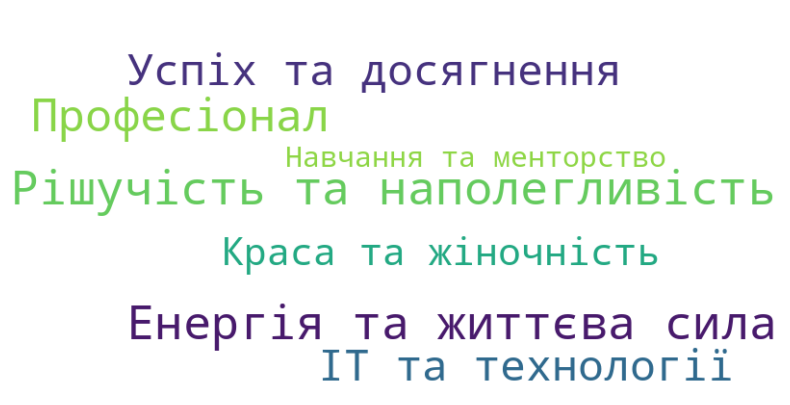

In [47]:
# Побудова хмари слів для груп
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white"
).generate_from_frequencies(group_counts)

# Візуалізація хмари слів
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()